# Data Preprocessing Template

## Importing the libraries

In [2]:
import numpy as np #does math and equations with arrays/lists.
import matplotlib.pyplot as plt #matplotlib shows graphs and plots, pyplot is a module in it that allows it to do more work.
import pandas as pd #helps with data manipulation and analysis.

## Importing the dataset

**A DataFrame is pandas' representation of a chart. To display data from a csv file into a DataFrame we use the .read_csv( ) functon.**

**To specify areas of chart to a variable, use the .iloc method, .iloc[start row:end row , start column: end column]. .values takes just the terms.**

**Also, NumPy arrays are the main way to store data using the NumPy library. They are similar to normal lists in Python, but have the advantage of being faster and having more built-in methods. NumPy arrays are created by calling the array () method from the NumPy library, like np.array()**

In [3]:
dataset = pd.read_csv(r'C:\Users\momoa\OneDrive\Desktop\Data preprocess.csv')
#indexing starts at 0
x = dataset.iloc[0:12, :3].values #the independent variable - country, age, salary. all the rows, all but last column.
y = dataset.iloc[:, -1].values #the dependent variable - whether or not they purchased. only the last column.
print(x)
print('      ')
print(y)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 nan]
 ['France' 35.0 58000.0]
 ['Spain' nan 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]
      
['No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes']


## Taking care of missing data
**Replace all missing values with mean of rest of filled data of same column.**

**1) assign an instance of the simpleimputer class. https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html - explains arguments.**

**2) use the fit( ) method to check for missing values in independent x columns and calculate that column's mean. Argument is all the NUMERICAL independent columns you want to check.**

**3) use the transform( ) method - actually replace the missing value with the mean. Same argument as fit( )**

In [4]:
from sklearn.impute import SimpleImputer #scikit learn is one of the main ML libraries.

imputer = SimpleImputer(missing_values =np.nan, strategy = 'mean') #creating an instance of the SimpleImputer class. 
imputer.fit(x[:,1:3]) #first is all rows. 
x[:, 1:3] = imputer.transform(x[:,1:3]) #first part is actually assigning the new values to the original.

print(x) #now nan is replaced with mean. 

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 63777.77777777778]
 ['France' 35.0 58000.0]
 ['Spain' 38.77777777777778 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


## Encoding Categorical Data
https://www.datacamp.com/community/tutorials/categorical-data| 
https://machinelearningmastery.com/columntransformer-for-numerical-and-categorical-data/
https://blog.contactsunny.com/data-science/columntransformer-in-scikit-for-labelencoding-and-onehotencoding-in-machine-learning
https://contactsunny.medium.com/label-encoder-vs-one-hot-encoder-in-machine-learning-3fc273365621

**We need to find a way for the ML model to understand what the categorical/string data such as the country names means.**

**Can't assign numbers b/c model may then think there is a natural numerical order to these countries, which there isn't. So, we separate the country column into 3 different columns - one for each country.**

**To do that, we use One-hot encoding. France is 100, Spain in 010, Germany is 001. (No numerical order!)**

### Encoding the independent variable:
**FOR THE COLUMNTRANSFORMER CLASS:**
**The first argument is an array called transformers, which is a list of tuples. The array has the following elements in the same order:**

**name: a name for the column transformer, which will make setting of parameters and searching of the transformer easy.(i.e. 'encoder')**

**transformer: here we’re supposed to provide an estimator. We can also just “passthrough” or “drop” if we want. But since we’re encoding the data in this example, we’ll use the OneHotEncoder here. Remember that the estimator you use here needs to support fit and transform.**

**column(s): the list of columns which you want to be transformed. In this case, we’ll only transform the first column.**

**Second argument is remainder. Setting remainder=’passthrough’ will mean that all columns not specified in the list of “transformers” will be passed through without transformation, instead of being dropped.**


**Then, we have to reassign x. We can combine fit and transform from previous step using fit_transform( ) method from ColumnTransformer class. That, though, does not return a NumPy array, so we have to use np.array( ).**

In [5]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
x = np.array(ct.fit_transform(x))

print(x) #now everything is 0 and 1.

[[1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [0.0 1.0 0.0 30.0 54000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 0.0 35.0 58000.0]
 [0.0 0.0 1.0 38.77777777777778 52000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 37.0 67000.0]]


### Encoding the dependent variable:

In [6]:
from sklearn.preprocessing import LabelEncoder
y = LabelEncoder().fit_transform(y)
print(y)

[0 1 0 0 1 1 0 1 0 1]


## Splitting the dataset into the Training set and Test set

**We'll split the data into 4 variables - x and y training, x and y testing.**

**test size is what percentage of the data will be used for testing. Putting a number in random state ensures that we'll always get the same ratio of numbers across the two sets.**

In [7]:
from sklearn.model_selection import train_test_split 
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [8]:
print(xtrain)
print('     ')
print(xtest)
print('     ')
print(ytrain)
print('     ')
print(ytest)

[[1.0 0.0 0.0 35.0 58000.0]
 [1.0 0.0 0.0 44.0 72000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 30.0 54000.0]
 [1.0 0.0 0.0 37.0 67000.0]
 [0.0 1.0 0.0 40.0 63777.77777777778]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 0.0 1.0 38.77777777777778 52000.0]]
     
[[0.0 1.0 0.0 50.0 83000.0]
 [0.0 0.0 1.0 27.0 48000.0]]
     
[1 0 1 0 1 1 0 0]
     
[0 1]


## Feature Scaling
https://machinelearningknowledge.ai/feature-scaling-machine-learning/#:~:text=%20Why%20Feature%20Scaling%20in%20Machine%20Learning%20,Feature%20Scaling%20in%20machine%20learning.%20The...%20More%20

**Not necessary for every dataset.**

**Done through normalization or standardization. Normalization used only for normal distribution. Standardization can be used for any situation.**

**Not going to apply feature scaling to y because y is binary (yes/no or 0/1 after encoding).**

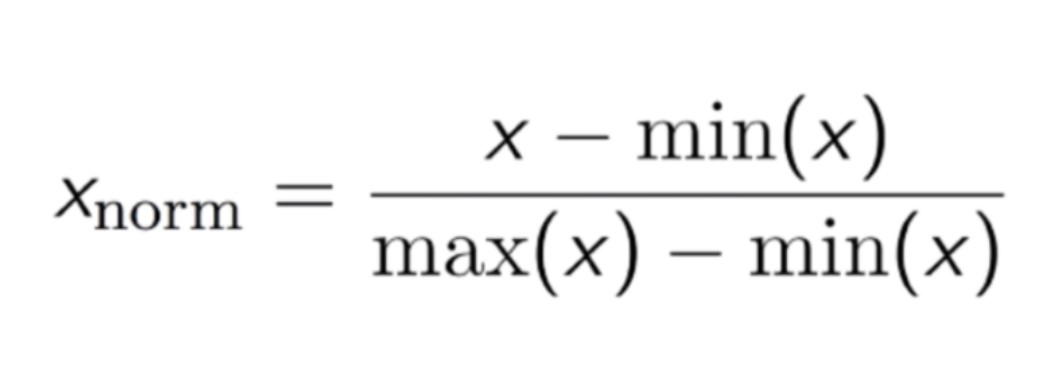

In [9]:
from PIL import Image
norm = Image.open('C:\\Users\\momoa\\Downloads\\normalization.jpg')
stan = Image.open('C:\\Users\\momoa\\Downloads\\standardization.jpg')
norm

In [1]:
stan
pass

NameError: name 'stan' is not defined

**You should NOT perform standardization or scaling on dummy (0,1) variables. The goal of standardization is to get values in a range of (-3,3). Dummy variables are already in this range, so we'll do the standardization with the values outside the range.**

**When you call StandardScaler.fit(X_train), what it does is calculate the mean and variance from the values in X_train. Then calling .transform() will transform/standardize all of the features by subtracting the mean and dividing by the variance. For convenience, these two function calls can be done in one step using fit_transform().**

**The reason you want to fit the scaler using only the training data is because you don't want to bias your model with information from the test data.**

**If you fit() to your test data, you'd compute a new mean and variance for each feature. In theory these values may be very similar if your test and train sets have the same distribution, but in practice this is typically not the case.**

**Instead, you want to only transform the test data by using the parameters computed on the training data.**

**If we will use the fit method on our test data too, we will compute a new mean and variance that is a new scale for each feature and will let our model learn about our test data too. Thus, what we want to keep as a surprise is no longer unknown to our model and we will not get a good estimate of how our model is performing on the test (unseen) data which is the ultimate goal of building a model using machine learning.**

**Example: Model learns mean value is 31.2 from training data. You want it to use that mean to fill in empty mean values in the test/new data. If you use fit on the test/new data- the computer will create a new mean value to use, which you do not want it to do. Thus, we do not fit the test/new data.**

https://www.youtube.com/watch?v=6as06vtXNL8

In [11]:
from sklearn.preprocessing import StandardScaler
scobj = StandardScaler()

xtrain[:, 3:] = scobj.fit_transform(xtrain[:, 3:]) #fit AND transform
xtest[:, 3:] = scobj.transform(xtest[:, 3:]) #only transform

In [12]:
print(xtrain)

[[1.0 0.0 0.0 -0.7529426005471072 -0.6260377781240918]
 [1.0 0.0 0.0 1.008453807952985 1.0130429500553495]
 [1.0 0.0 0.0 1.7912966561752484 1.8325833141450703]
 [0.0 1.0 0.0 -1.7314961608249362 -1.0943465576039322]
 [1.0 0.0 0.0 -0.3615211764359756 0.42765697570554906]
 [0.0 1.0 0.0 0.22561095973072184 0.05040823668012247]
 [0.0 0.0 1.0 -0.16581046438040975 -0.27480619351421154]
 [0.0 0.0 1.0 -0.013591021670525094 -1.3285009473438525]]


In [13]:
print(xtest)

[[0.0 1.0 0.0 2.1827180802863797 2.3008920936249107]
 [0.0 0.0 1.0 -2.3186282969916334 -1.7968097268236927]]
